In [160]:
import os 
import sys
import numpy as np 
import pandas as pd
import pylab as pl
import datetime 
from matplotlib.dates import date2num
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [8]:
path1 = os.getenv("DFDATA")

In [14]:
path1

'/gws/open/NYCOpenData/nycopendata/data'

In [16]:
path2=r'dvm6-udsa/1473437627/dvm6-udsa.csv'

In [217]:
data=pd.read_csv(path1+'/'+path2,parse_dates=['Violation Date'])

In [218]:
data.head()

,Ticket Number,Violation Date,Violation Time,Issuing Agency,Respondent Last Name,Respondent First Name,Balance Due,Violation Location (Borough),Violation Location (Block No.),Violation Location (Lot No.),...,Compliance Status,Violation Description,Charge #1: Code,Charge #1: Code Section,Charge #1: Code Description,Charge #1: Infraction Amount,Charge #2: Code,Charge #2: Code Section,Charge #2: Code Description,Charge #2: Infraction Amount
0,040445863X,2012-12-22,01:46:00,SANITATION POLICE,ADERDOR,SAID,$385.00,MANHATTAN,NaN,NaN,...,Penalty Due,NaN,AH3G,H.C. 89.25 A,IMPROPER GARBAGE COLLECTION AND OR DISPOSAL,$385.00,NaN,NaN,NaN,NaN
1,040426052Z,2012-07-09,03:38:00,SANITATION POLICE,RYAD,MAGDY,$0.00,MANHATTAN,NaN,NaN,...,All Terms Met,NaN,AH3G,H.C. 89.25 A,IMPROPER GARBAGE COLLECTION AND OR DISPOSAL,$385.00,NaN,NaN,NaN,NaN
2,040380790J,2007-05-10,12:27:00,SANITATION RECYCLING,COMPUTIME INC PROFIT,NaN,$0.00,BROOKLYN,1992.0,24.0,...,All Terms Met,NaN,AH50,H.C. 151.03 A,RAT INFESTATION,$200.00,NaN,NaN,NaN,NaN
3,040491275R,2007-07-11,16:27:00,SANITATION POLICE,509 CHAUNCEY LLC,NaN,$0.00,BROOKLYN,1511.0,71.0,...,All Terms Met,NaN,AH50,H.C. 151.03 A,RAT INFESTATION,$200.00,NaN,NaN,NaN,NaN
4,040494029P,2009-02-18,09:42:00,SANITATION RECYCLING,ALI,SHEHZAD ANWAR,$0.00,BROOKLYN,3187.0,38.0,...,All Terms Met,NaN,AH50,H.C. 151.03 A,RAT INFESTATION,$200.00,NaN,NaN,NaN,NaN


## Assignment 3

In [219]:
data_part_1 = data[['Violation Location (Block No.)','Violation Location (Lot No.)']]

In [220]:
data_part_1.columns = ['Block','Lot']

In [221]:
data_part_1.head()

,Block,Lot
0,NaN,NaN
1,NaN,NaN
2,1992.0,24.0
3,1511.0,71.0
4,3187.0,38.0


In [222]:
data_part_1 = data_part_1.dropna(how='all').reset_index(drop=True)

In [225]:
data_part_1.head()

,Block,Lot
0,1992.0,24.0
1,1511.0,71.0
2,3187.0,38.0
3,3173.0,15.0
4,3191.0,30.0


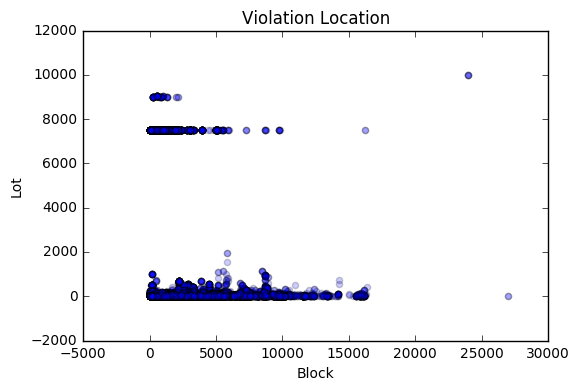

In [228]:
ax = data_part_1.plot.scatter(x='Block',y='Lot',alpha = 0.2)
ax.set_title('Violation Location')

## Extra point

In [215]:
data_part_2= data[['Violation Date','Charge #1: Infraction Amount']]

In [209]:
data_part_2.head()

,Violation Date,Charge #1: Infraction Amount
0,1960-08-02,500.0
1,1963-02-09,100.0
2,1977-10-05,0.0
3,1985-10-26,500.0
4,1988-01-09,0.0


In [ ]:
data_part_2 = data_part_2.sort('Violation Date').reset_index(drop=True)

In [ ]:
data_part_2['Charge #1: Infraction Amount'] = data_part_2['Charge #1: Infraction Amount'].replace('[$]'
                                                                    ,'',regex =  True).astype(float)

In [ ]:
data_part_2 = data_part_2.fillna(0)

In [210]:
data_part_2.head()

,Violation Date,Charge #1: Infraction Amount
0,1960-08-02,500.0
1,1963-02-09,100.0
2,1977-10-05,0.0
3,1985-10-26,500.0
4,1988-01-09,0.0


In [ ]:
data_part_2['Violation Date']=data_part_2['Violation Date'].apply(lambda x: x.date())

In [211]:
data_part_2.columns = ['Date','Charge']

In [212]:
data_part_2.head()

,Date,Charge
0,1960-08-02,500.0
1,1963-02-09,100.0
2,1977-10-05,0.0
3,1985-10-26,500.0
4,1988-01-09,0.0


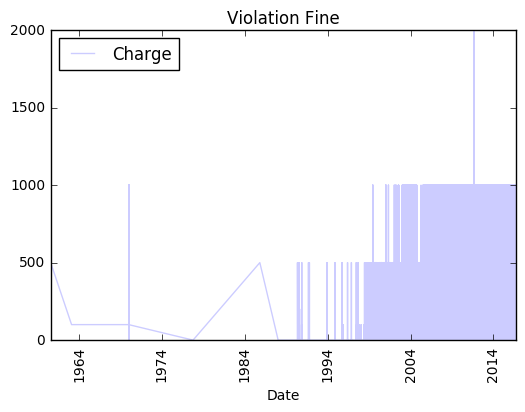

In [207]:
ax = data_part_2.plot(x = 'Date',y = 'Charge',alpha = 0.2, rot = 90)
ax.set_title("Violation Fine")